Fixing the conductor widths and varying the gap width

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import skrf as rf
from skrf import Frequency
from skrf.media import CPW

# Library for computing figures of interest for cpw structures
import ResonatorOptimizer as ro

plt.style.use('seaborn-deep')

In [2]:
# Global Parameters
__er = 11.9
__fo = 7.3e09
__h = 500e-06
__t = 50e-09
__pen_depth = 39e-09
__total_width = 43.8e-06
__total_width_max = 100e-06
__length = 8102.64e-06

__keyind = lambda X,X_array: min(enumerate(X_array), key=lambda x: abs(x[1]-X))

# Sweep geometry parameters to find figures of interest for different cpw widths and gaps

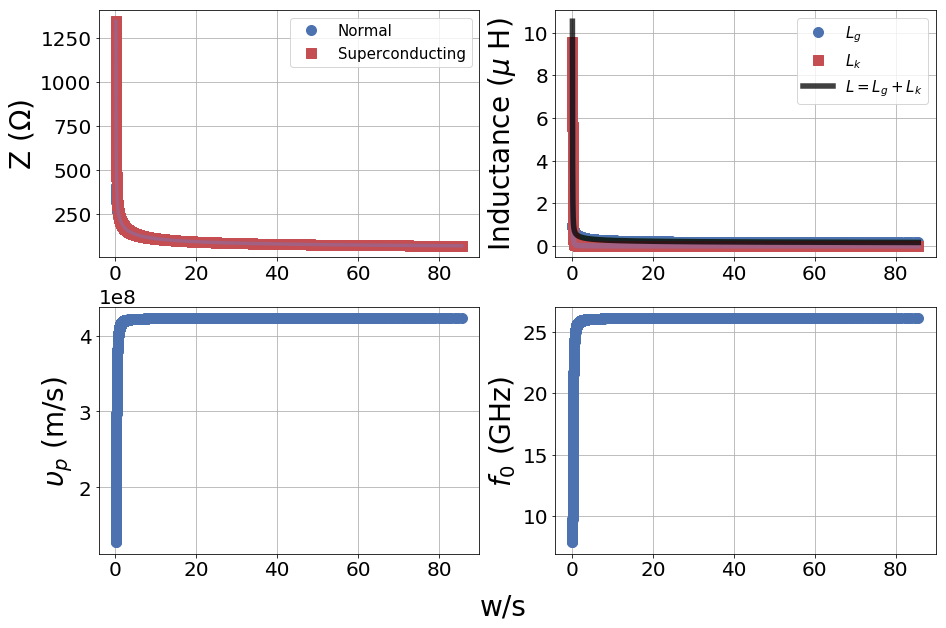

In [3]:
# Instantiate parameter sweep object
ps = ro.ParamSweeps(__length,__total_width,__fo,__er,__h,__t,__pen_depth)

# Sweep geometry to see effect on parameters of interest
minw, maxw, wit = [2, (__total_width*1e06)-1, 0.01]
# minw, maxw, wit = [2, 8, 0.01]
sweep_params = ps.width_to_gap(minw,maxw,wit=wit)
ps.plot_params(sweep_params)

# Cavity

In [4]:
cav_width = 4.00e-06
cav_length = 8102.64e-06

cav_tw_sweep = np.arange(cav_width+0.1e-06,__total_width_max,2e-06)

cav_Lk = []
cav_gap = []
cav_total_width = []

for i in range(len(cav_tw_sweep)):
    cav_total_width.append(cav_tw_sweep[i])
    minw, maxw, wit = [cav_width*1e06, (cav_total_width[i]*1e06), 0.1]
    params = ps.width_to_gap(minw,maxw,wit=wit)
    cav_gap = .5*(cav_total_width[i] - cav_width)
    cavity = ro.cpwCalcs(cav_width,cav_gap,cav_length,__fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
    cav_Lk.append(cavity.Lk())

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/cpwcalcs.py:32: RuntimeWarning: invalid value encountered in sqrt
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/cpwcalcs.py:55: RuntimeWarning: invalid value encountered in log


# High Z

In [5]:
highZ_width = 2.50e-06
highZ_length = cav_length/2

highZ_tw_sweep = np.arange(highZ_width+0.1e-06,__total_width_max,2e-06)

highZ_Lk = []
highZ_gap = []
highZ_total_width = []

for i in range(len(highZ_tw_sweep)):
    highZ_total_width.append(highZ_tw_sweep[i])
    minw, maxw, wit = [highZ_width*1e06, (highZ_total_width[i]*1e06), 0.1]
    params = ps.width_to_gap(minw,maxw,wit=wit)
    highZ_gap = .5*(highZ_total_width[i] - cav_width)
    highZ = ro.cpwCalcs(highZ_width,highZ_gap,highZ_length,__fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
    highZ_Lk.append(highZ.Lk())

# Low Z

In [6]:
lowZ_width = 10.0e-06
lowZ_length = cav_length/2

lowZ_tw_sweep = np.arange(lowZ_width+0.1e-06,__total_width_max,2e-06)

lowZ_Lk = []
lowZ_gap = []
lowZ_total_width = []

for i in range(len(lowZ_tw_sweep)):
    lowZ_total_width.append(lowZ_tw_sweep[i])
    minw, maxw, wit = [lowZ_width*1e06, (lowZ_total_width[i]*1e06), 0.1]
    params = ps.width_to_gap(minw,maxw,wit=wit)
    lowZ_gap = .5*(lowZ_total_width[i] - cav_width)
    lowZ = ro.cpwCalcs(lowZ_width,lowZ_gap,lowZ_length,__fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
    lowZ_Lk.append(lowZ.Lk())

/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:340: UserWarning: tight_layout not applied: number of rows in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


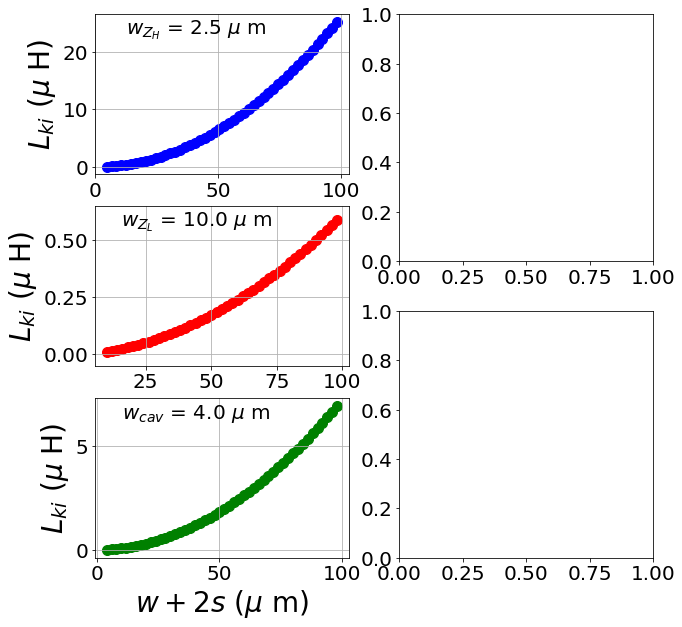

In [7]:
plt.figure(figsize=(10,10))
ax0 = plt.subplot(3,2,1)
ax0.scatter(highZ_tw_sweep*1e06,np.array(highZ_Lk)*1e06,s=100,color='blue')
ax0.set_ylabel('$L_{ki}$ ($\mu$ H)')
ax0.text(.4,.9,'$w_{{Z_{{H}}}}$ = {} $\mu$ m'.format(highZ_width*1e06),fontsize=20,horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes )
# plt.xlim(0,0.0001*1e06)
# plt.ylim(0,0.000008*1e06)
ax0.grid()

ax1 = plt.subplot(3,2,3)
ax1.scatter(lowZ_tw_sweep*1e06,np.array(lowZ_Lk)*1e06,s=100,color='red')
ax1.set_ylabel('$L_{ki}$ ($\mu$ H)')
ax1.text(.4,.9,'$w_{{Z_{{L}}}}$ = {} $\mu$ m'.format(lowZ_width*1e06),fontsize=20,horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes )
ax1.grid()

ax2 = plt.subplot(3,2,5)
ax2.scatter(cav_tw_sweep*1e06,np.array(cav_Lk)*1e06,s=100,color='green')
ax2.set_xlabel('$w+2s$ ($\mu$ m)')
ax2.set_ylabel('$L_{ki}$ ($\mu$ H)')
ax2.text(.4,.9,'$w_{{cav}}$ = {} $\mu$ m'.format(cav_width*1e06),fontsize=20,horizontalalignment='center',
         verticalalignment='center', transform=ax2.transAxes )
ax2.grid()

plt.subplot(2,2,2)
plt.subplot(2,2,4)
plt.tight_layout()
plt.show()

# Create cpw sections, and modify lengths

In [8]:
tw = 80e-06
cav_gap = .5*(tw - cav_width) 
highZ_gap = .5*(tw - highZ_width) 
lowZ_gap = .5*(tw - lowZ_width) 

cav_length = 3502.64e-06
cavity= ro.cpwCalcs(cav_width, cav_gap, cav_length, __fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
cavity.Lk()
cavity.impedance_kinetic()
cavity.phase_velocity()

cav_f0 = 1 / (2 * cav_length* np.sqrt(cavity.capacitance_per_length() * cavity.Ltotal() ) )
cavity_vp = cavity.phase_velocity()
cavity_beta = cavity.phase_constant()
cavity_Z = cavity.impedance_kinetic()
cavity_Lt = cavity.Ltotal()

print('fo = ',cav_f0*1e-09)

fo =  6.919270946569277


In [9]:
lowZ_length = cav_length+14e-06
Zlow = ro.cpwCalcs(lowZ_width, lowZ_gap, lowZ_length, __fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
Zlow.Lk()
Zlow.impedance_kinetic()
Zlow.phase_velocity()

low_f0 = 1 / (4 * lowZ_length* np.sqrt(Zlow.capacitance_per_length() * Zlow.Ltotal() ) )
low_vp = Zlow.phase_velocity()
low_beta = Zlow.phase_constant()
low_Z = Zlow.impedance_kinetic()
low_Lt = Zlow.Ltotal()
print('fo = ',low_f0*1e-09)

fo =  6.919273270248597


In [10]:
# highZ_length = 8102.64e-06
highZ_length = cav_length - cav_length/2 - 736.55e-06
Zhigh = ro.cpwCalcs(highZ_width, highZ_gap, highZ_length, __fo, __er, h=__h, t=__t, pen_depth=__pen_depth)
Zhigh.Lk()

Zhigh.phase_velocity()

high_f0 = 1 / (4 * highZ_length* np.sqrt(Zhigh.capacitance_per_length() * Zhigh.Ltotal() ) )
high_vp = Zhigh.phase_velocity()
high_beta = Zhigh.phase_constant()
high_Z = Zhigh.impedance_kinetic()
high_Lt = Zhigh.Ltotal()
print('fo = ',high_f0*1e-09)

fo =  6.919012697972941


In [11]:
lambda_cav = 1/np.sqrt( (cavity.inductance_per_length() + cavity.Lk()*cav_length) * (cavity.capacitance_per_length()) )
lambda_low = 1/(np.sqrt( (Zlow.inductance_per_length() + Zlow.Lk()*lowZ_length) * (Zlow.capacitance_per_length()) )) 
lambda_high = 1/(np.sqrt( (Zhigh.inductance_per_length() + Zhigh.Lk()*highZ_length) * (Zhigh.capacitance_per_length()) ))

beta_cav = cav_f0 * np.sqrt( (cavity.inductance_per_length() + cavity.Lk()*cav_length) * (cavity.capacitance_per_length()) )
beta_low = low_f0 * (np.sqrt( (Zlow.inductance_per_length() + Zlow.Lk()*lowZ_length) * (Zlow.capacitance_per_length()) )) 
beta_high = high_f0 * (np.sqrt( (Zhigh.inductance_per_length() + Zhigh.Lk()*highZ_length) * (Zhigh.capacitance_per_length()) ))

vp_cav = cav_f0 / beta_cav
vp_low = low_f0 / beta_low
vp_high = high_f0 / beta_high

dic = {'Length':{'Cavity':cav_length*1e06 , 'LowZ':lowZ_length*1e06 , 'HighZ':highZ_length*1e06 },
       'fo':{'Cavity': cav_f0*1e-09, 'LowZ': low_f0*1e-09, 'HighZ':high_f0*1e-09 },
       'Impedance':{'Cavity': cavity_Z, 'LowZ': low_Z, 'HighZ': high_Z},
       'Lt':{'Cavity': cavity_Lt*1e06, 'LowZ': low_Lt*1e06, 'HighZ': high_Lt*1e06},
       'Wavelength':{'Cavity': lambda_cav, 'LowZ': lambda_low, 'HighZ': lambda_high},
       'beta':{'Cavity': beta_cav, 'LowZ': beta_low, 'HighZ': beta_high},
       'vp':{'Cavity': vp_cav, 'LowZ': vp_low, 'HighZ': vp_high},
}

df = pd.DataFrame(data = dic)
df

,Impedance,Length,Lt,Wavelength,beta,fo,vp
Cavity,268.621666,3502.64,5.541856,1.170368e+08,59.120453,6.919271,1.170368e+08
HighZ,512.091485,1014.77,18.233742,1.170575e+08,59.107828,6.919013,1.170575e+08
LowZ,105.782377,3516.64,1.086838,1.179455e+08,58.664981,6.919273,1.179455e+08


So, the new design will have the following parameters:

* $w_{{cav}} = 4 \mu m$
* $s_{{cav}} =  38 \mu m$
* $l_{{cav}} = 3502.64 \mu m$ 


* $w_{{low}} = 10 \mu m$
* $s_{{low}} =  35 \mu m$
* $l_{{low}} = 3516.64 \mu m$


* $w_{{high}} = 2.5 \mu m$
* $s_{{high}} =  38.75 \mu m$
* $l_{{high}} = 1014.77 \mu m$